In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from mpl_toolkits import mplot3d
from scipy import stats
import statsmodels.api as sm
from scipy.optimize import curve_fit

In [4]:
# Import SIE data
directory = Path('Sea Ice')

files = [file_name for file_name in os.listdir(directory) if file_name.endswith('.csv')]

SIE_N = pd.DataFrame(columns=['year','mo','extent'])
SIE_S = pd.DataFrame(columns=['year','mo','extent'])

# Import SIE for North and South
for indx,file in enumerate(files):
    path_to_file = os.path.join(directory, file)
    data_file = pd.read_csv(path_to_file) 
    data_file.columns = data_file.columns.str.strip()
    if (data_file['region'].str.strip() == 'N').all() == True:
        SIE_N = pd.concat([SIE_N, data_file[['year','mo','extent']]])
    elif (data_file['region'].str.strip() == 'S').all() == True:
        SIE_S = pd.concat([SIE_S, data_file[['year','mo', 'extent']]]) 
        

# Put in chronological order
SIE_N = SIE_N.sort_values(['year','mo'])
SIE_S = SIE_S.sort_values(['year','mo'])


# Substitute -9999 values for NaN
SIE_N['extent'] = SIE_N['extent'].mask(SIE_N['extent'] < SIE_N['extent'].quantile(0.01))

(4.0, 17.0)

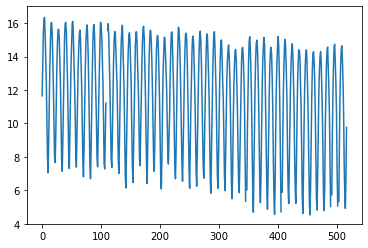

In [5]:
# Plot SIE_N
plt.plot(np.array(SIE_N['extent']))
plt.ylim([4,17])

In [6]:
# Import Temperature Data
directory = Path('Temperature')

files = [file_name for file_name in os.listdir(directory) if file_name.endswith('.csv')]
file = files[0]
path_to_file = os.path.join(directory, file)
data_file = pd.read_csv(path_to_file) 
data_file.columns = data_file.columns.str.strip()
T = data_file.iloc[1978-1880:, 1:13]

# Put values in chronological order in a flat list
T_all = T.values.tolist()
T_flat = [item for sublist in T_all for item in sublist]
T_flat = T_flat[10:-1]
T_flat = [float(i) for i in T_flat]

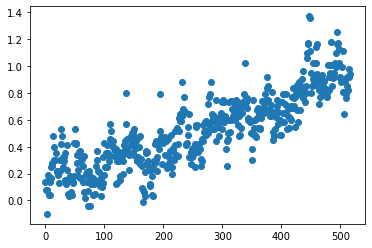

In [7]:
# Plot Temperature
t = np.linspace(0,len(T_flat)-1,len(T_flat))
plt.scatter(t,T_flat)

r: -0.0950683883107054


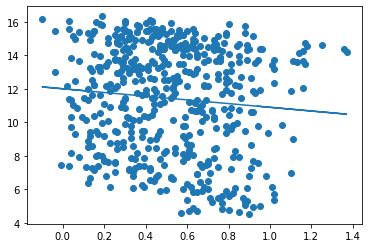

In [8]:
# Doing all the data points yields very bad r
SIEN_extent = np.array(SIE_N['extent'])
T_flat0 = np.array(T_flat)
valid = ~(np.isnan(T_flat0) | np.isnan(SIEN_extent))
m, b, r, p, std_err = stats.linregress(T_flat0[valid], SIEN_extent[valid])
print('r:', r)
plt.scatter(T_flat0, SIEN_extent)
plt.plot(T_flat0, m*T_flat0+b)

r: 0.17739636015434437


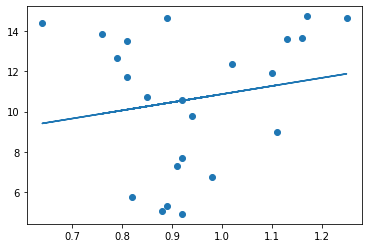

In [15]:
# Doing single year windows yields very good results
SIEN_extent = np.array(SIE_N['extent'])[-24:]
T_flat0 = np.array(T_flat)[-24:]
valid = ~(np.isnan(T_flat0) | np.isnan(SIEN_extent))
m, b, r, p, std_err = stats.linregress(T_flat0[valid], SIEN_extent[valid])
print('r:', r)
plt.scatter(T_flat0, SIEN_extent)
plt.plot(T_flat0, m*T_flat0+b)

r: -0.8207605879660878
SEr: 0.18702402278290373


Text(0.5, 0, 'Temperature')

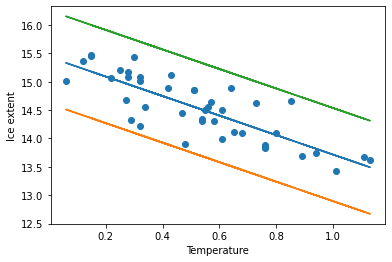

In [26]:
# Doing same month throught the years yields very good results
SIEN_extent = np.array(SIE_N['extent'])[5::12]
T_flat0 = np.array(T_flat)[5::12]
valid = ~(np.isnan(T_flat0) | np.isnan(SIEN_extent))
m, b, r, p, std_err = stats.linregress(T_flat0[valid], SIEN_extent[valid])
print('r:', r)
print('SEr:', std_err)
plt.scatter(T_flat0, SIEN_extent)
plt.plot(T_flat0, m*T_flat0+b)
plt.plot(T_flat0, m*T_flat0+b+r)
plt.plot(T_flat0, m*T_flat0+b-r)
plt.ylabel('Ice extent')
plt.xlabel('Temperature')
